<a href="https://colab.research.google.com/github/kuretaru/topo-ml-spin-phases/blob/develop/materials/lessons/1_1_Ising_Model_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Main imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Learning complex (before the main task is completed).

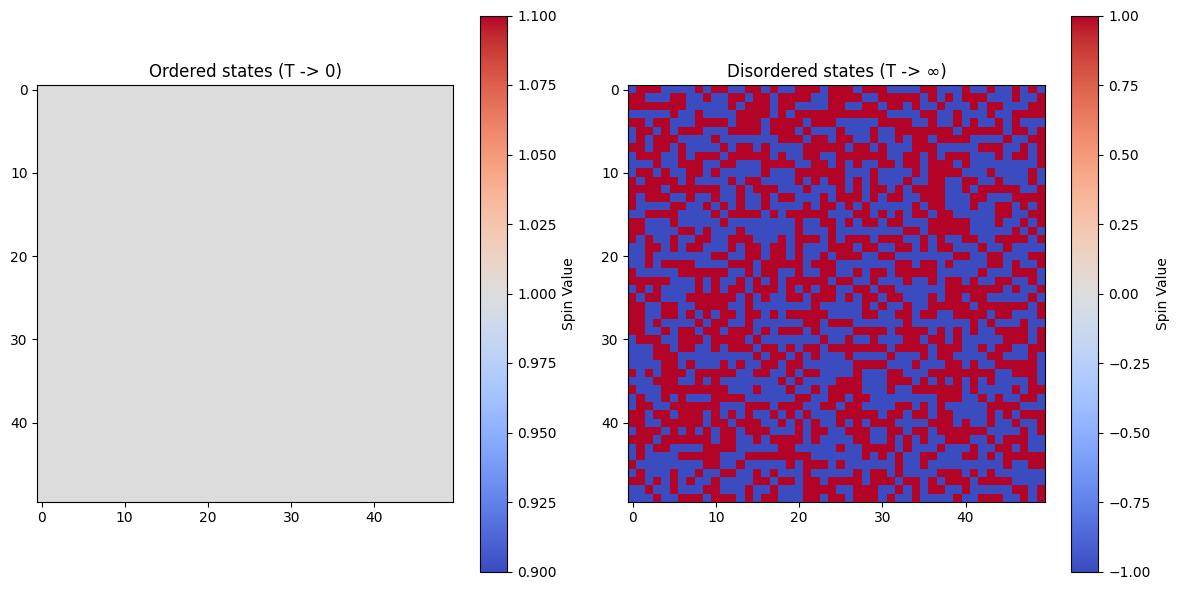

In [3]:
# Configuration parametrs.
lattice_size = 50


# Generating states.

# Case A: Cold states (Ordered or Ferromagnetic)
# We interreped '1' as 'spin_up'.
cold_state = np.ones((lattice_size, lattice_size))

# Case B: Hot states (Disordered or Paramagnetic)
# We randomly choose between '-1' (spin down) and '1' (spin up).
hot_state = np.random.choice([-1, 1], (lattice_size, lattice_size))


# Visualisation.
plt.figure(figsize=(12, 6))

# Plotting the Cold state.
plt.subplot(1, 2, 1)                    # 1 row, 2 columns, index 1
plt.imshow(cold_state, cmap='coolwarm')
plt.title('Ordered states (T -> 0)')
plt.colorbar(label = 'Spin Value')

# Plotting the Hot state.
plt.subplot(1, 2, 2)                    # 1 row, 2 columns, index 1
plt.imshow(hot_state, cmap='coolwarm')
plt.title('Disordered states (T -> ∞)')
plt.colorbar(label = 'Spin Value')

# Display the plot
plt.tight_layout()
plt.show()

**Task 1: Negative Saturation**

Create a lattice of size 100x100 where all spins are aligned downwards (-1).

    Key concepts: Initialization, Broadcasting (if you multiply array by -1).

    Goal: Visualize the result using imshow.

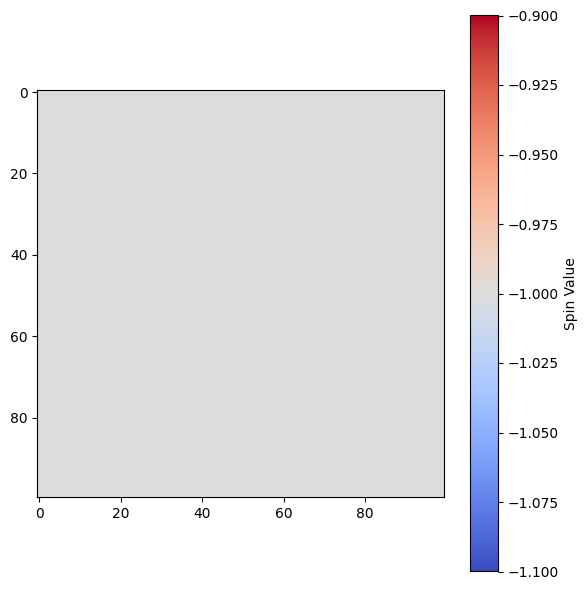

In [11]:
# Configuration parametrs.
lattice_size = 100


# Generating state with spin down.

# First solution:
# spin_down_state = np.random.choice([-1, -1], (lattice_size, lattice_size))

# Second solution:
# spin_ones = np.ones((lattice_size, lattice_size))
# spin_down_state = spin_ones * -1

# Third solutiom (the best):
spin_down_state = np.full((lattice_size, lattice_size), -1)


# Visualisation
plt.figure(figsize=(6,6))

plt.imshow(spin_down_state, cmap='coolwarm')
plt.colorbar(label = 'Spin Value')

plt.tight_layout()
plt.show()

**Task 2: Phase Interface (Slicing)**

Create a `60x60` lattice representing a system with two distinct regions:

    The upper half (rows 0 to 30) should be in a Disordered state (random noise).

    The lower half (rows 30 to 60) should be in an Ordered state (all spins = 1).

    Hint: Initialize the array first, then use slicing (array[start:stop, :]) to overwrite a region.

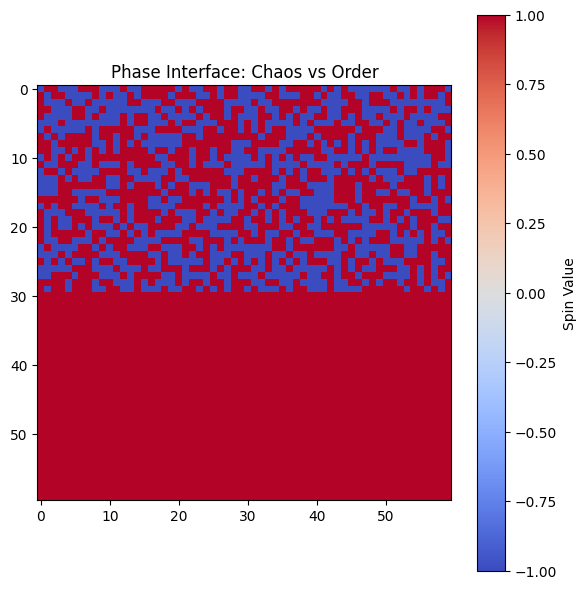

In [21]:
# Configuration parametrs.
lattice_size = 60
half_lattice_size = int(lattice_size / 2)

# Upper half states.
selected_state = np.ones((lattice_size, lattice_size))

# Lower half states.
selected_state[0:half_lattice_size, :] = np.random.choice([1, -1], size=(half_lattice_size, lattice_size))

# Visualisation
plt.figure(figsize=(6,6))
plt.title("Phase Interface: Chaos vs Order")

plt.imshow(selected_state, cmap='coolwarm')
plt.colorbar(label = 'Spin Value')

plt.tight_layout()
plt.show()

**Task 3: Deterministic Generator Function**

Write a Python function named generate_simple_lattice.

    Input arguments:

        L (int): Lattice size.

        temp (float): Temperature.

    Logic:

        If temp is below 2.0, return an array of ones (Ordered).

        If temp is 2.0 or higher, return a random array of -1 and 1 (Disordered).

    Output: Call this function twice (once with temp=1.0, once with temp=5.0) and plot the results side-by-side

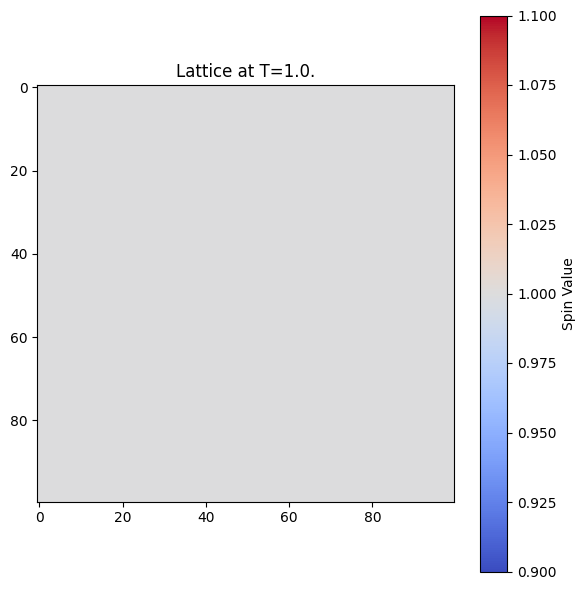

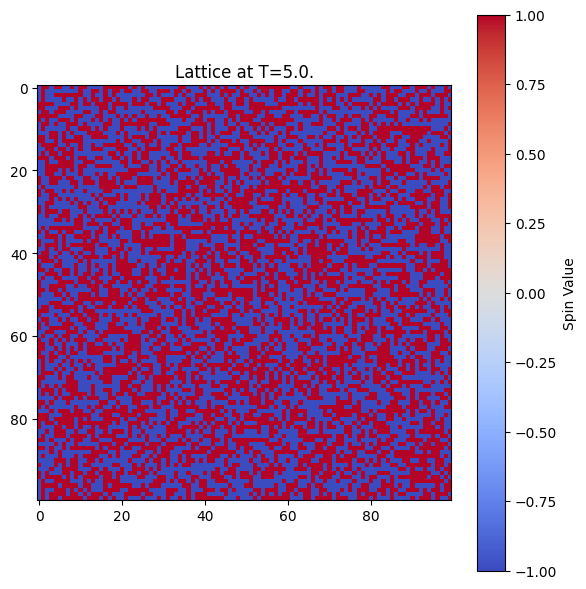

In [27]:
def generate_simple_lattice(L, temp):
  """
  Generates a simple lattice for the plot.

  Args:
    L (int):      A lattice of the plot.
    temp (float): A temperature.

  Returns: numpy matrix.
  """
  return np.ones((L,L)) if temp < 2 else np.random.choice([-1, 1], (L,L))


def show_plot(L, temp):
  """
  Shows a plot for our config.

  Args:
    L (int):      A lattice of the plot.
    temp (float): A temperature.

  Raises:
    ValueError: If data type is mismatched.
  """
  if not isinstance(L, int) or not isinstance(temp, float):
    raise ValueError("Lattice should be an integer; Temperature should be a float! Aborting...")

  data = generate_simple_lattice(L, temp)

  plt.figure(figsize=(6,6))
  plt.title(f"Lattice at T={temp}.")

  plt.imshow(data, cmap='coolwarm')
  plt.colorbar(label = 'Spin Value')

  plt.tight_layout()
  plt.show()

if __name__ == "__main__":
  show_plot(100, 1.0)
  show_plot(100, 5.0)